<a href="https://colab.research.google.com/github/ZackPashkin/colab-snippets-ngrok-flask/blob/main/How_to_display_a_video_with_flask_ngrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installation
!pip install flask==0.12.2
!pip install flask-ngrok
!pip install pytube

     |████████████████████████████████| 92kB 3.7MB/s 
  Found existing installation: Flask 1.1.2
    Uninstalling Flask-1.1.2:
      Successfully uninstalled Flask-1.1.2
     |████████████████████████████████| 51kB 3.0MB/s 


In [2]:
# create dirs (flask needs static directory)
!mkdir /content/static
!mkdir /content/static/videos

# download video from youtube
from pytube import YouTube
import shutil
video = YouTube('https://www.youtube.com/watch?v=WTuC8vg3m_w')
video.streams.filter(file_extension = "mp4").all()
video.streams.get_by_itag(18).download()
shutil.copy2("/content/NEW Super Mario Bloopers 4.mp4","/content/static/videos")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  if __name__ == '__main__':


'/content/static/videos/NEW Super Mario Bloopers 4.mp4'

In [3]:
!mkdir templates
%cd /content/templates

html = """
<!DOCTYPE html> 
<html> 
<body> 

<video width="400" controls>
  <source src="{{video}}" type="video/mp4">

</video>

<p>
Video courtesy of 
<a href="https://www.youtube.com/watch?v=WTuC8vg3m_w" target="_blank">NEW Super Mario Bloopers 4</a>.
</p>

</body> 
</html>

"""

with open("index.html","a+") as f:
  f.write(html)

%cd /content

/content/templates
/content


In [4]:
from flask_ngrok import run_with_ngrok
from flask import Flask,render_template
import os
from glob import glob

VIDEO_FOLDER = os.path.join('static', 'videos')

app = Flask(__name__)

#starts ngrok when the app is run
run_with_ngrok(app)   
video = glob(VIDEO_FOLDER+"/*.mp4")[0]



@app.route("/")
def home():
    return render_template("index.html", video = video)
app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://73345db31759.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [05/Mar/2021 04:15:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Mar/2021 04:15:26] "GET /static/videos/NEW%20Super%20Mario%20Bloopers%204.mp4 HTTP/1.1" 206 -
127.0.0.1 - - [05/Mar/2021 04:15:27] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [05/Mar/2021 04:15:29] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [05/Mar/2021 04:15:29] "GET /static/videos/NEW%20Super%20Mario%20Bloopers%204.mp4 HTTP/1.1" 206 -


## RResult should look like
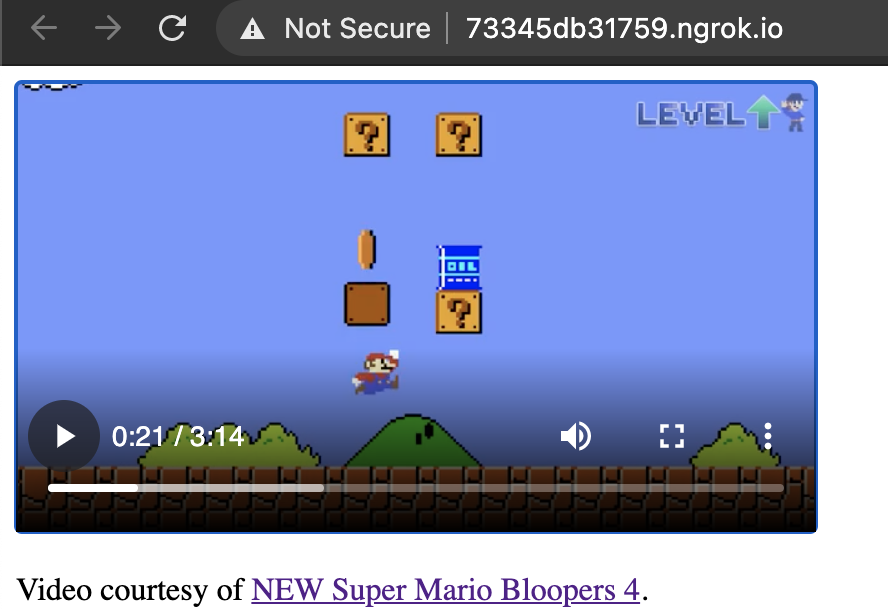